# Data Visualization Notebook

## Objectives

This notebook creates the basic building blocks we need to address Business Requirement 4:
## 4. User-Friendly Interface* 
Create an interactive and user-friendly dashboard for visualizing various aspects of the dataset and model performance.* 
Include features for uploading images, viewing prediction results, and accessing prediction reports
## .
Key St
1. ction.
Mean and Standard Deviation * mages:

Visualize the "mean" and "standard deviation" images for both pizza and n* Ht-pizza.
Highlight the differences between these images to aid visual differ
2. entiation.
Difference Between Aver* ge Images:

Showcase the disparity between an average pizza and not-pizza to facilitate visual u
3. nderstanding.
Image Mo* tage Feature:

Develop an image montage feature for both pizzas and non-pizzas, aiding visual 
4. differentiation.
Predicts* er-uploaded images.
Include features for users to interpret model outputs a

6. d confidence levels.n*  reports in CSV format.
Ensure the reports provide detailed information on each examined image's classification and associated confidence level.w.mproved user communication.


## Inputs

* inputs/carlosrunner/pizza-not-pizza/pizza_not_pizza/train
* inputs/carlosrunner/pizza-not-pizza/pizza_not_pizza/test
* inputs/carlosrunner/pizza-not-pizza/pizza_not_pizza/validation

## Outputs

* Image shape embeddings pickle file.
* Mean and variability of images per label plot.
* Plot to distinguish the contrast between pizza or not-pizza images.
* Generate code that can be usend improved user experience.on the Streamlit dashboard.

---

# Set Data Directory

---

## Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread
from PIL import Image

## Set working directory

In [2]:
cwd= os.getcwd()

In [3]:
os.chdir('/workspaces/pizza-not-pizza')
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspaces/pizza-not-pizza'

## Set input directories

Set train, validation and test paths.

In [5]:
my_data_dir = 'inputs/carlosrunner/pizza-not-pizza/pizza_not_pizza'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


### Set label names

In [7]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['pizza', 'not_pizza']


---

# Data visualisation of image data

---

## Image shape 

Compute average images size on train set:

In [8]:
new_size = (256, 256)

In [9]:
# Source directory with original images
source_dir = 'inputs/carlosrunner/pizza-not-pizza/pizza_not_pizza'

In [10]:
# Recursively iterate through the source directory and its subdirectories
for root, dirs, files in os.walk(source_dir):
    for filename in files:
       if filename.endswith((".jpg", ".png")):
           original_img_path = os.path.join(root, filename)
           original_img = Image.open(original_img_path)
           # Resize the image with anti-aliasing (use a different filter if 'ANTIALIAS' doesn't work)
           resized_img = original_img.resize(new_size, resample=Image.BICUBIC)
           # Save the resized image back to its original location, overwriting the original image
           resized_img.save(original_img_path)

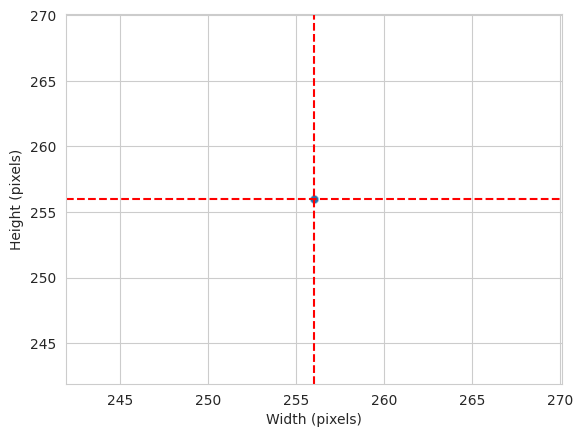

Width average: 256 
Height average: 256


In [11]:
# Initialize empty lists to store image dimensions
dim1, dim2 = [], []


for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + image_filename)
        d1, d2, colors = img.shape
        dim1.append(d1)  # image height
        dim2.append(d2)  # image width

sns.set_style("whitegrid")

# Create a scatter plot of image dimensions
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)

axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")

# Calculate and plot the mean dimensions
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='r', linestyle='--')
axes.axhline(y=dim2_mean, color='r', linestyle='--')

plt.show()

print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

Images size for training the model is the average from all images in the train set.

In [12]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape

(256, 256, 3)

Save the image shape embeddings

In [13]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

---

## Average and variability of images  per label

### Function to load images in an array (tensor)

In [14]:
from tensorflow.keras.preprocessing import image


def load_image_as_array(my_data_dir, new_size=(50, 50), n_images_per_label=20):

    # Initialize empty NumPy arrays to store images and labels
    X, y = np.array([], dtype='int'), np.array([], dtype='object')

    # List of labels (subdirectories) in the specified data directory
    labels = os.listdir(my_data_dir)

    # Iterate through each label
    for label in labels:
        counter = 0
        # Iterate through image files in the label's directory
        for image_filename in os.listdir(my_data_dir + '/' + label):
            # Limit the number of images per label to avoid processing too many
            if counter < n_images_per_label:

                # Load and resize the image using Keras preprocessing
                img = image.load_img(
                    my_data_dir + '/' + label + '/' + image_filename, target_size=new_size)

                # Load and resize the image using Keras preprocessing
                if image.img_to_array(img).max() > 1:
                    img_resized = image.img_to_array(img) / 255
                else:
                    img_resized = image.img_to_array(img)

                # Append the resized image to the X array and label to the y array
                X = np.append(X, img_resized).reshape(-1,
                                                      new_size[0], new_size[1], img_resized.shape[2])
                y = np.append(y, label)
                counter += 1

    return X, y

### Load image shapes and labels in an array

In [15]:
X, y = load_image_as_array(my_data_dir=train_path,
                           new_size=image_shape,
                           n_images_per_label=30)
print(X.shape, y.shape)

(60, 256, 256, 3) (60,)


### Plot and save mean and variability of images per label

In [16]:
def plot_mean_variability_per_labels(X, y, figsize=(12, 5), save_image=False):

    for label_to_display in np.unique(y):
        sns.set_style("white")

        # Create a boolean mask for the current label
        y = y.reshape(-1, 1, 1)
        boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
        arr = X[boolean_mask]

        # Calculate average and standard deviation images
        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)
        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")

        # Create subplots for average and variability images
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average image for label {label_to_display}")
        axes[0].imshow(avg_img, cmap='gray')
        axes[1].set_title(f"Variability image for label {label_to_display}")
        axes[1].imshow(std_img, cmap='gray')

        if save_image:
            # Save the images if save_image is True
            plt.savefig(f"{file_path}/avg_var_{label_to_display}.png",
                        bbox_inches='tight', dpi=150)
        else:
            # Display the images
            plt.tight_layout()
            plt.show()
            print("\n")

==== Label not_pizza ====
Image Shape: (256, 256, 3)
==== Label pizza ====
Image Shape: (256, 256, 3)


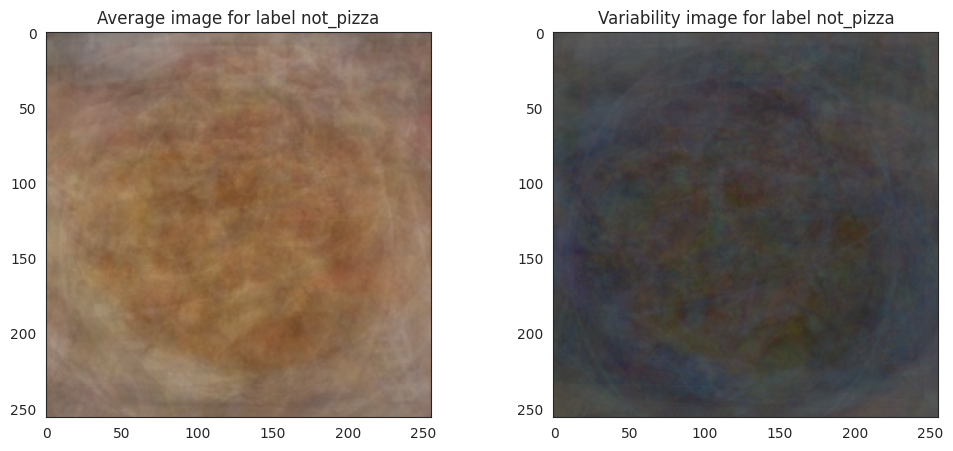

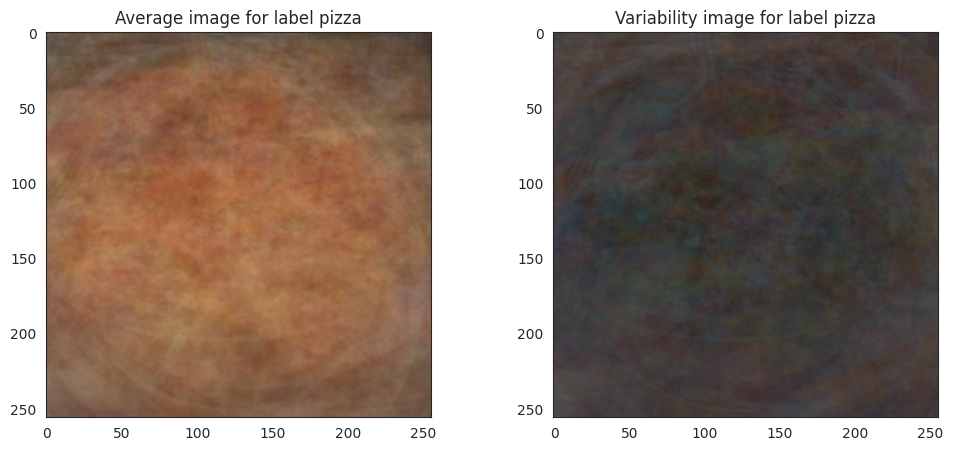

In [17]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12, 5), save_image=True)

---

## Difference between average pizza and not-pizza images

---

In [18]:
def subset_image_label(X, y, label_to_display):
    y = y.reshape(-1, 1, 1)
    boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
    df = X[boolean_mask]
    return df


def diff_bet_avg_image_labels_data_as_array(X, y, label_1, label_2, figsize=(20, 5), save_image=False):
    sns.set_style("white")

    if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
        print(
            f"Either label {label} or label {label_2}, are not in {np.unique(y)} ")
        return

    # calculate mean from label1
    images_label = subset_image_label(X, y, label_1)
    label1_avg = np.mean(images_label, axis=0)

    # calculate mean from label2
    images_label = subset_image_label(X, y, label_2)
    label2_avg = np.mean(images_label, axis=0)

    # calculate difference and plot difference, avg label1 and avg label2
    difference_mean = label1_avg - label2_avg
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    axes[0].imshow(label1_avg, cmap='gray')
    axes[0].set_title(f'Average {label_1}')
    axes[1].imshow(label2_avg, cmap='gray')
    axes[1].set_title(f'Average {label_2}')
    axes[2].imshow(difference_mean, cmap='gray')
    axes[2].set_title(f'Difference image: Avg {label_1} & {label_2}')
    if save_image:
        plt.savefig(f"{file_path}/avg_diff.png", bbox_inches='tight', dpi=150)
    else:
        plt.tight_layout()
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


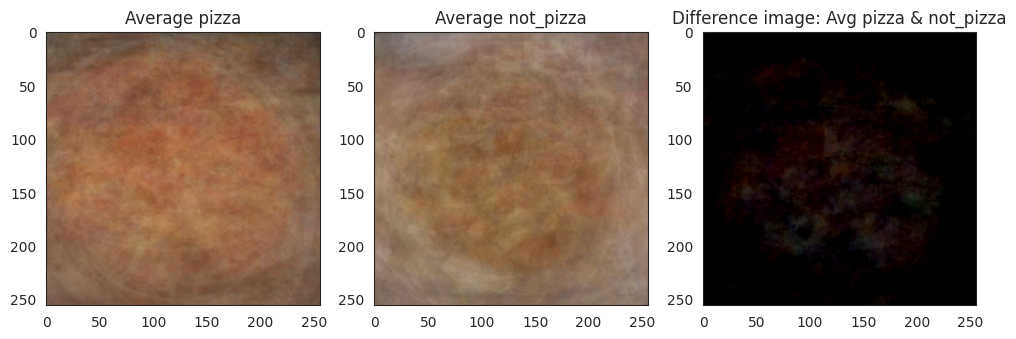

In [19]:
diff_bet_avg_image_labels_data_as_array(X=X, y=y,
                                        label_1='pizza', label_2='not_pizza',
                                        figsize=(12, 10),
                                        save_image=True
                                        )

---

## Image Montage

In [20]:
import itertools
import random
sns.set_style("white")


def image_montage(dir_path, label_to_display, nrows, ncols, figsize=(15, 10)):

    labels = os.listdir(dir_path)

    # subset the class you are interested to display
    if label_to_display in labels:

        # checks if your montage space is greater than the subset size
        images_list = os.listdir(dir_path + '/' + label_to_display)
        if nrows * ncols < len(images_list):
            img_idx = random.sample(images_list, nrows * ncols)
        else:
            print(
                f"Decrease nrows or ncols to create your montage. \n"
                f"There are {len(images_list)} in your subset. "
                f"You requested a montage with {nrows * ncols} spaces")
            return

        # create a list of axes indices based on nrows and ncols
        list_rows = range(0, nrows)
        list_cols = range(0, ncols)
        plot_idx = list(itertools.product(list_rows, list_cols))

        # create a Figure and display images
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
        for x in range(0, nrows*ncols):
            img = imread(dir_path + '/' + label_to_display + '/' + img_idx[x])
            img_shape = img.shape
            axes[plot_idx[x][0], plot_idx[x][1]].imshow(img)
            axes[plot_idx[x][0], plot_idx[x][1]].set_title(
                f"Width {img_shape[1]}px x Height {img_shape[0]}px")
            axes[plot_idx[x][0], plot_idx[x][1]].set_xticks([])
            axes[plot_idx[x][0], plot_idx[x][1]].set_yticks([])
        plt.tight_layout()
        plt.show()

    else:
        print("The label you selected doesn't exist.")
        print(f"The existing options are: {labels}")

Run Montage in all labels:

pizza


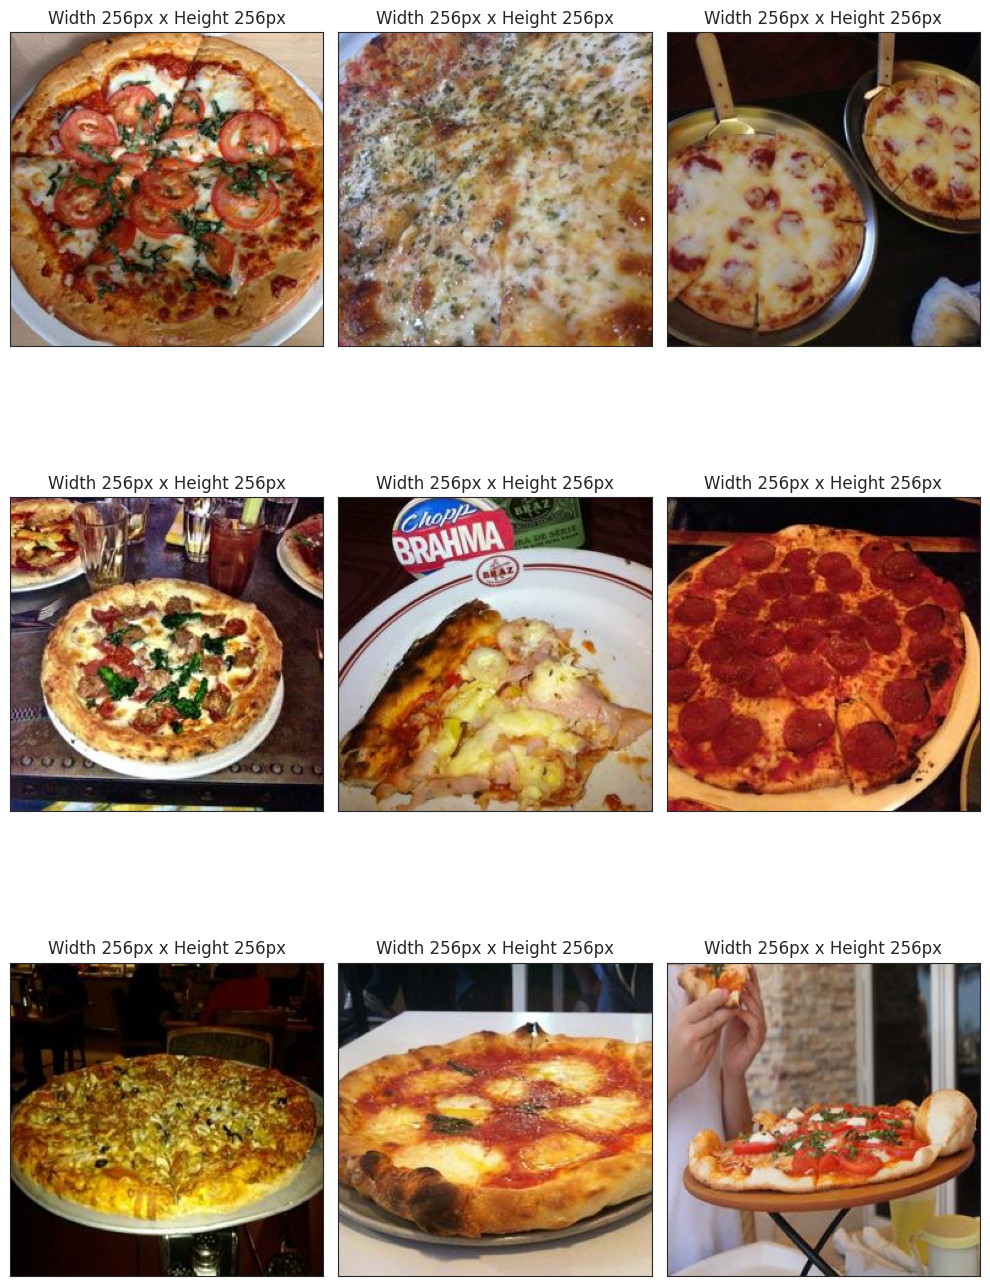



not_pizza


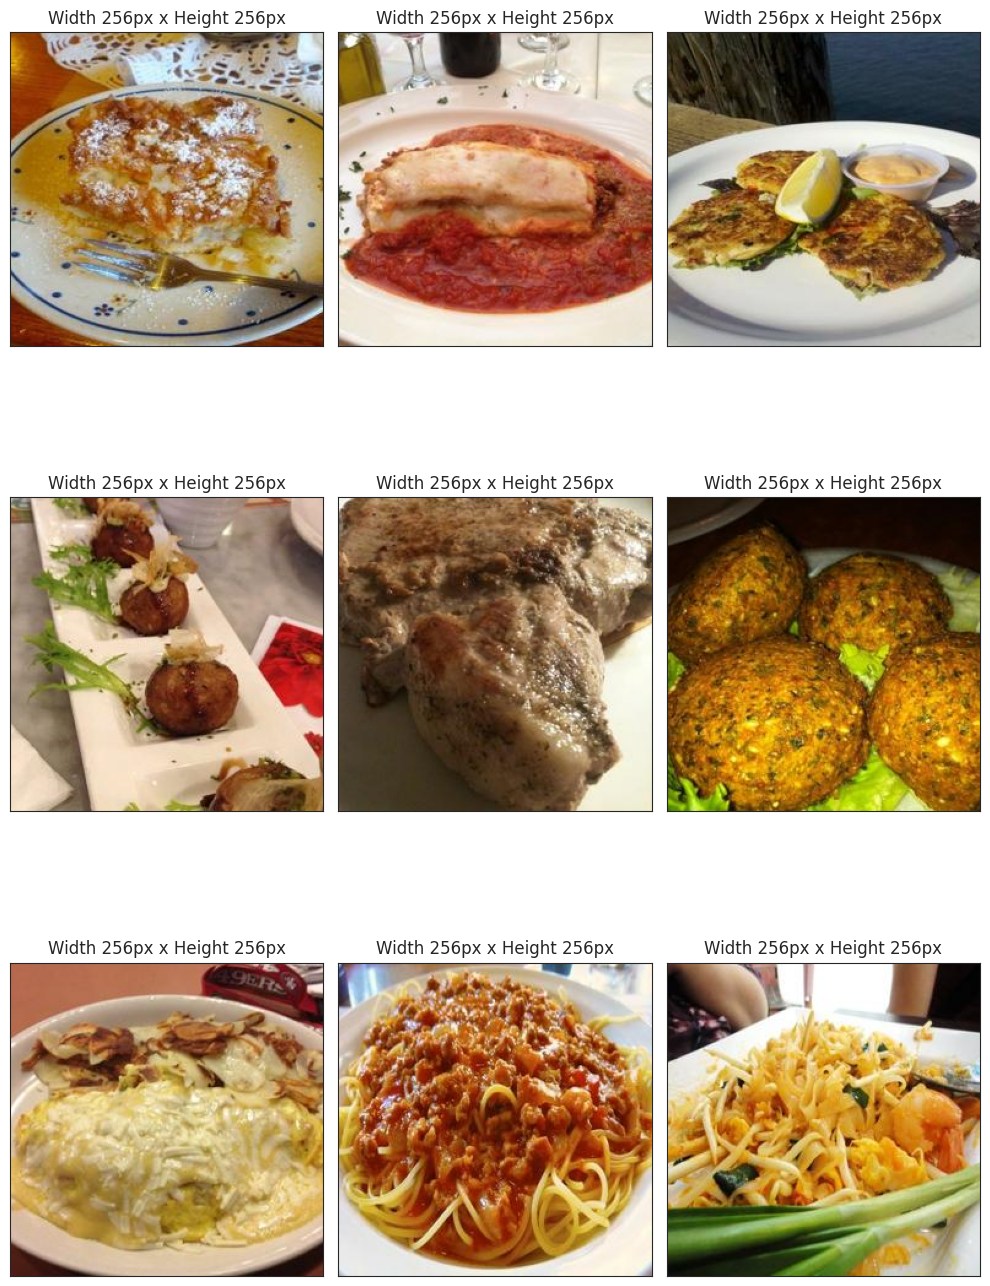

In [21]:
for label in labels:
    print(label)
    image_montage(dir_path=train_path,
                  label_to_display=label,
                  nrows=3, ncols=3,
                  figsize=(10, 15)
                  )
    print("\n")

---